In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/league-of-legends-soloq-ranked-games/lol_ranked_games.csv
/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


In [132]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [133]:
warnings.filterwarnings("ignore")

In [134]:
df = pd.read_csv("/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")

In [135]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [137]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [138]:
# Create a custom palette using HEX codes 
hex = sns.color_palette(["#FF6B6B", "#4ECDC4", "#45B7D1","#FAD02E", "#594F4F"])

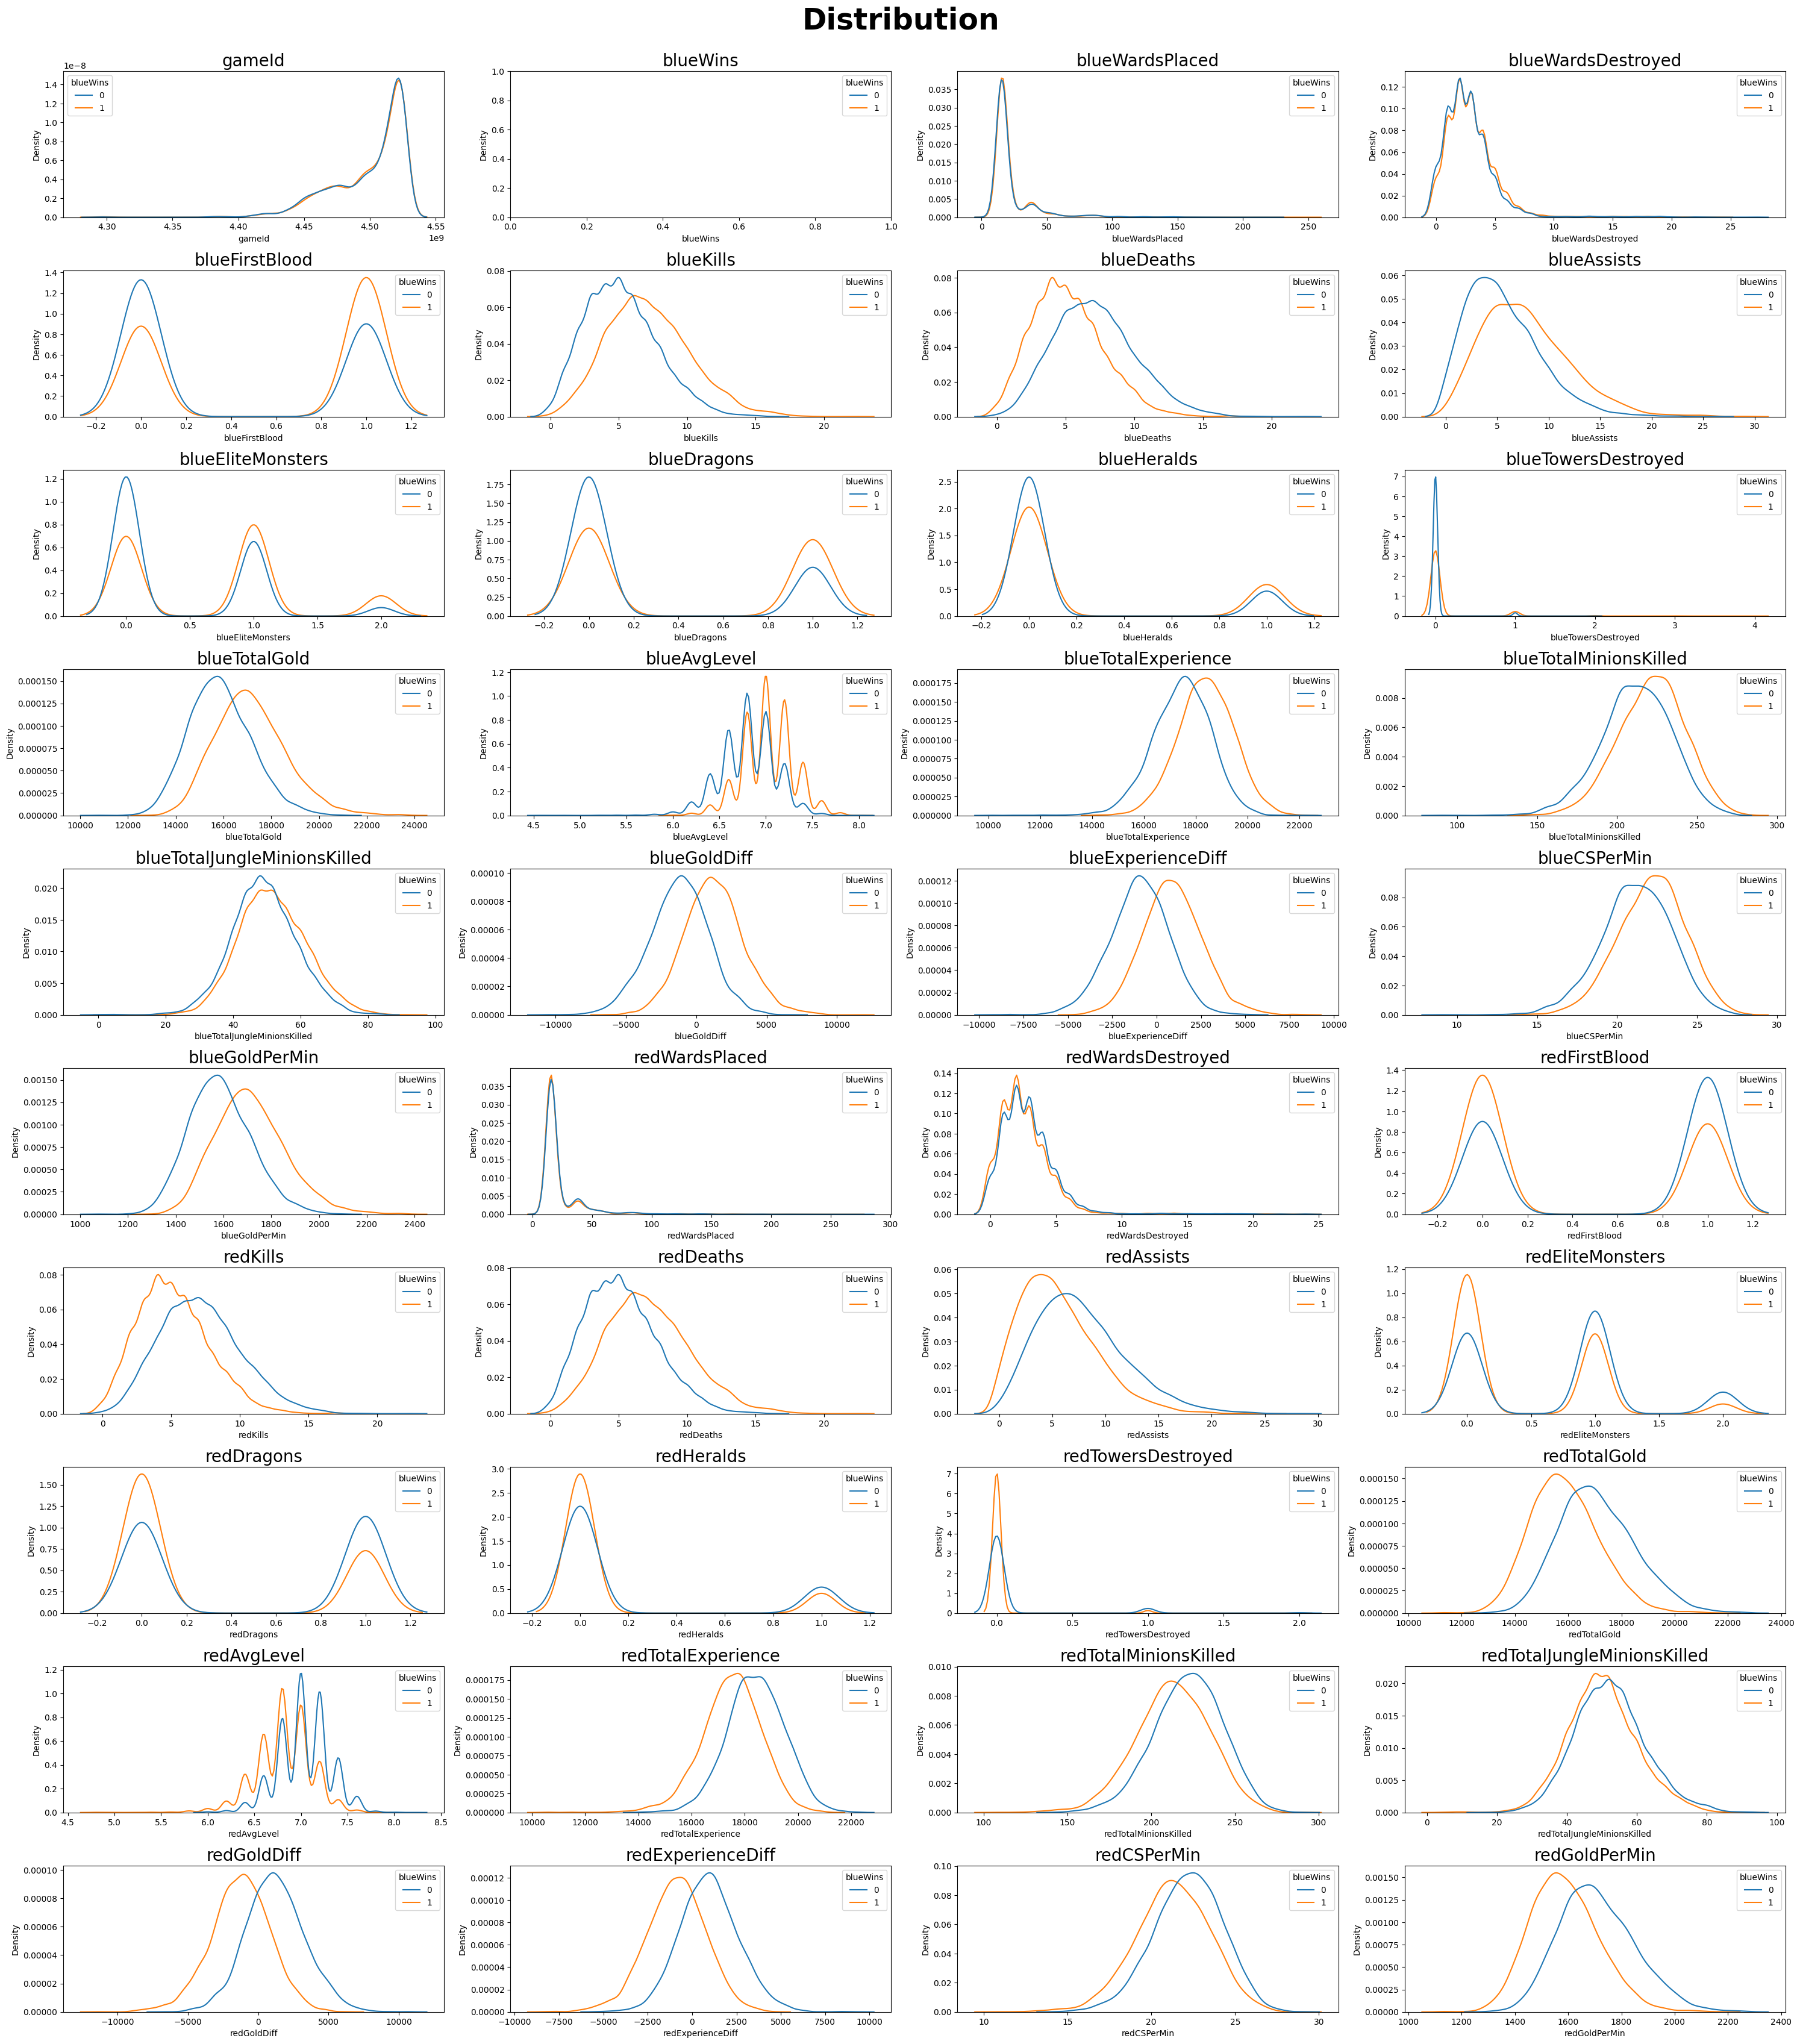

In [139]:
fig, ax = plt.subplots(figsize=(30,50))
pivot = 1

for column in df.columns:
    plt.subplot(15,4, pivot)
    sns.kdeplot(x=df[column], hue=df['blueWins'])
    plt.title(f'{column}', fontsize=20)
    pivot+=1
plt.suptitle('Distribution', fontsize=35, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

In [140]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

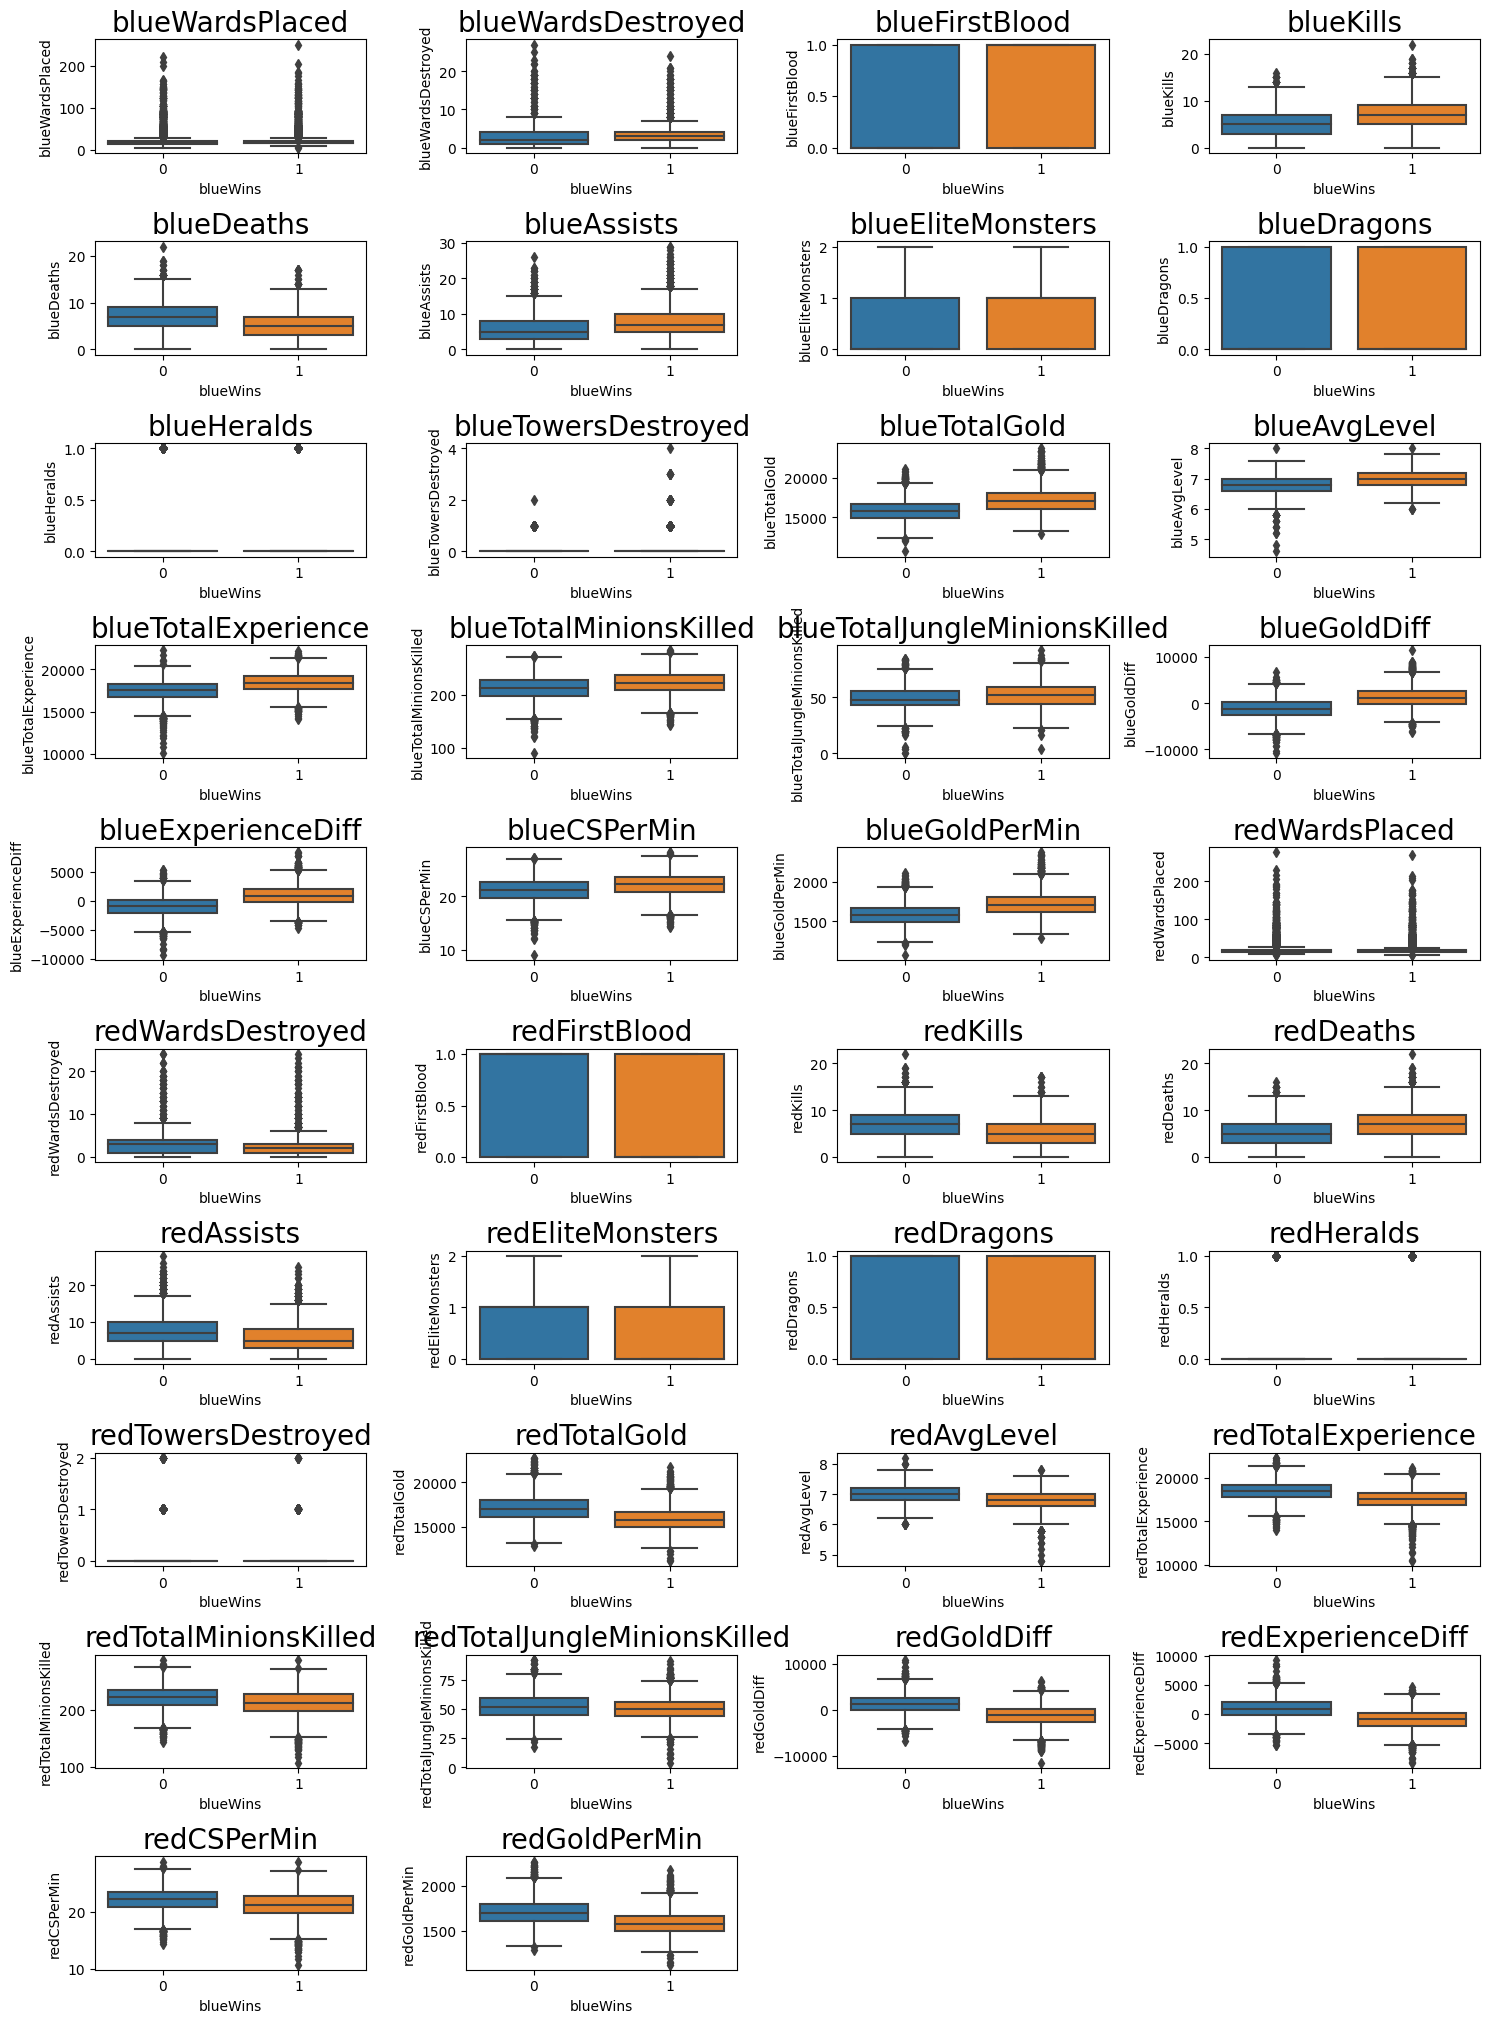

In [142]:
fig, ax = plt.subplots(figsize=(15,30))
pivot = 1
for i in df.columns[2:]:
    plt.subplot(15,4, pivot)
    sns.boxplot(x=df['blueWins'], y=df[i])
    plt.title(f'{i}', fontsize=20)
    pivot += 1
plt.tight_layout()
plt.show()

In [143]:
print(df.groupby('blueWins').mean()['blueKills'])
print('-'*30)
print(df.groupby('blueWins').mean()['blueDeaths'])

blueWins
0    5.170135
1    7.201623
Name: blueKills, dtype: float64
------------------------------
blueWins
0    7.131138
1    5.140365
Name: blueDeaths, dtype: float64


In [144]:
print(df.groupby('blueWins').mean()['blueGoldDiff'])
print(df.groupby('blueWins').mean()['redGoldDiff'])

blueWins
0   -1237.066680
1    1270.718053
Name: blueGoldDiff, dtype: float64
blueWins
0    1237.066680
1   -1270.718053
Name: redGoldDiff, dtype: float64


In [145]:
print(df.groupby('blueWins').mean()['blueExperienceDiff'])
print(df.groupby('blueWins').mean()['redExperienceDiff'])

blueWins
0   -971.898969
1    908.274442
Name: blueExperienceDiff, dtype: float64
blueWins
0    971.898969
1   -908.274442
Name: redExperienceDiff, dtype: float64


In [146]:
print(df.groupby('blueWins').mean()['blueKills'])
print(df.groupby('blueWins').mean()['redDeaths'])
print('-'*30)
print(df.groupby('blueWins').mean()['blueDeaths'])
print(df.groupby('blueWins').mean()['redKills'])

blueWins
0    5.170135
1    7.201623
Name: blueKills, dtype: float64
blueWins
0    5.170135
1    7.201623
Name: redDeaths, dtype: float64
------------------------------
blueWins
0    7.131138
1    5.140365
Name: blueDeaths, dtype: float64
blueWins
0    7.131138
1    5.140365
Name: redKills, dtype: float64


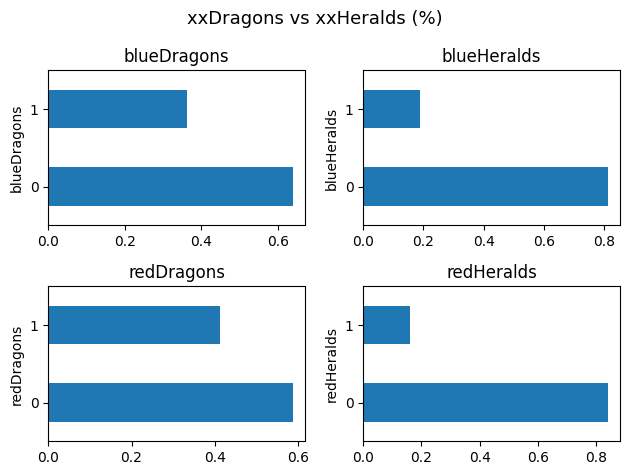

In [147]:
plt.subplot(2, 2, 1)
plt.title('blueDragons')
df.blueDragons.value_counts(normalize=True).plot(kind='barh')

plt.subplot(2, 2, 2)
plt.title('blueHeralds')
df.blueHeralds.value_counts(normalize=True).plot(kind='barh')

plt.subplot(2, 2, 3)
plt.title('redDragons')
df.redDragons.value_counts(normalize=True).plot(kind='barh')

plt.subplot(2, 2, 4)
plt.title('redHeralds')
df.redHeralds.value_counts(normalize=True).plot(kind='barh')

plt.suptitle('xxDragons vs xxHeralds (%)', fontsize=13)
plt.tight_layout()

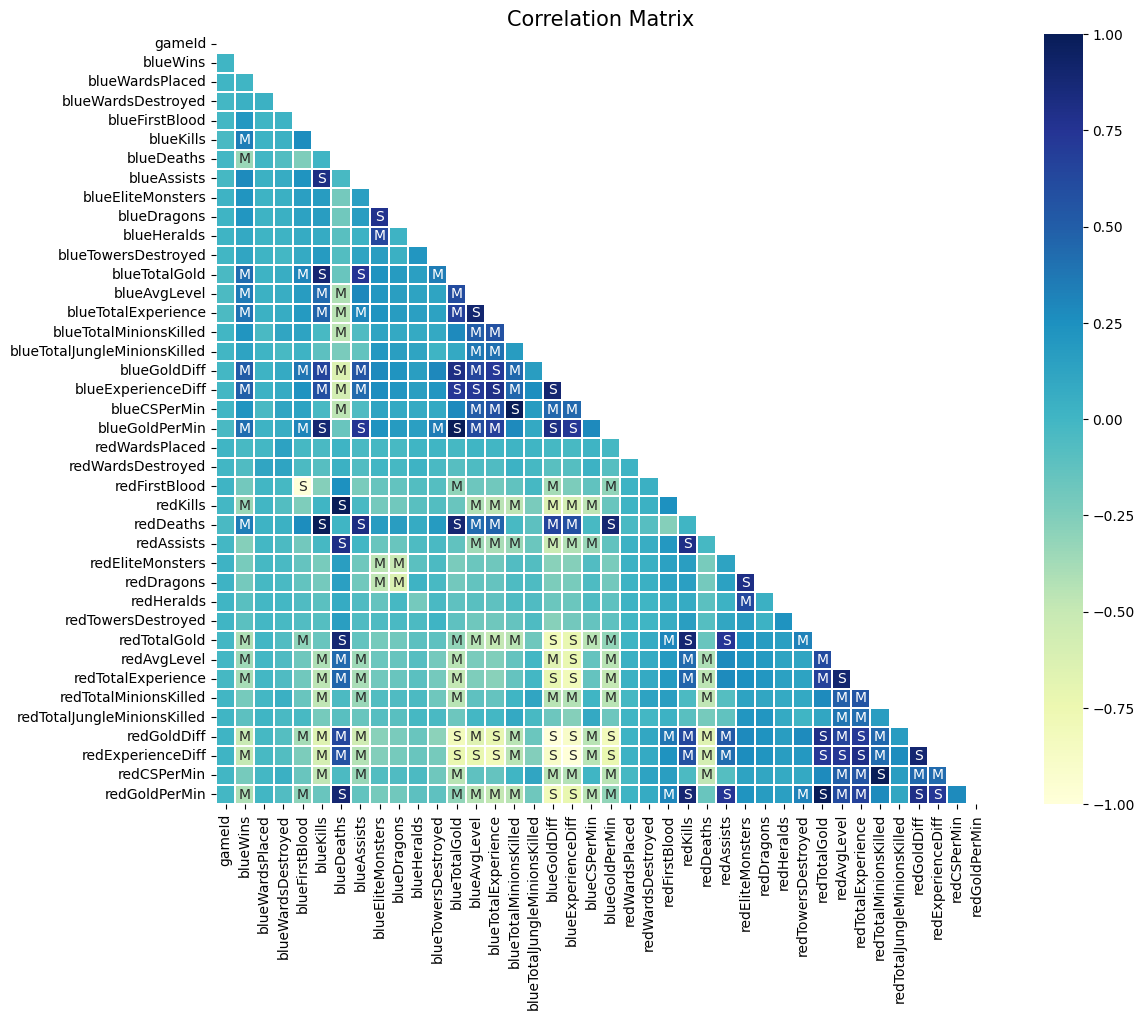

In [149]:
plt.figure(figsize=(15, 10))

labels = np.where(np.abs(df.corr())>=0.7,'S', np.where(np.abs(df.corr())>=0.3,'M', ''))

mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(data=df.corr(), square=True, linewidths=0.1, cmap='YlGnBu', mask=mask, annot=labels, fmt='')
g.set_xticklabels(g.get_xticklabels())
plt.title('Correlation Matrix', fontsize=15)
plt.show()

Data Cleaning

In [151]:
# Outlier detection using IQR rule
def get_outlier(df=None, column=None, weight=1.5):
    new_col = df[df['blueWins'] == 1][column] # Detect the outlier separately when the blueWins is 0 or 1
    quantile_25 = np.percentile(new_col.values, 25)
    quantile_75 = np.percentile(new_col.values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = new_col[(new_col < lowest) | (new_col > highest)].index
    return outlier_idx

In [155]:
# Create dataframe after remove outlier by IQR rule
new_df = df.copy()

for col in new_df.columns[2:]:
    outlier_idx = get_outlier(df=new_df, column=col, weight=1.5)
    
    new_df.drop(outlier_idx, axis=0, inplace=True)

print('Removed outliers: %d' % (df.shape[0] - new_df.shape[0]))

Removed outliers: 3082


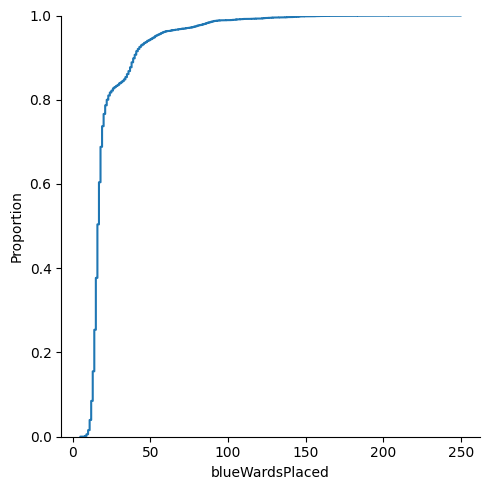

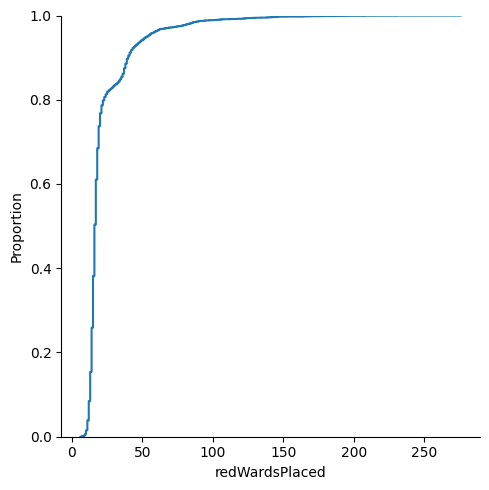

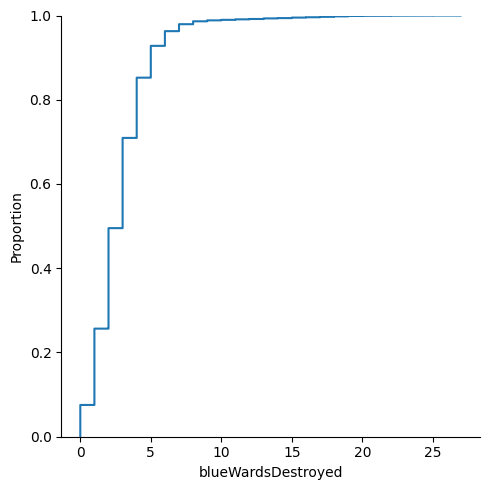

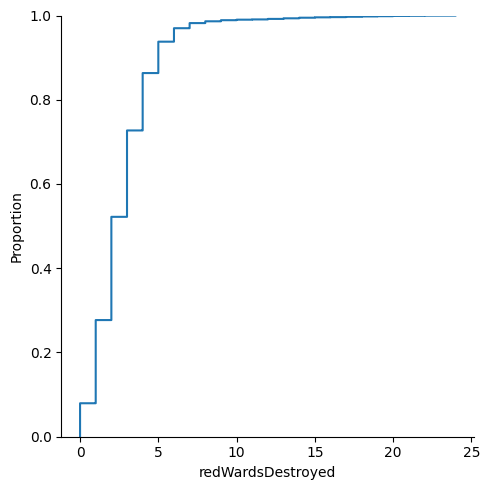

In [161]:
# ecdf plot of features with outliers
ecdf_col = ['blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed', 'redWardsDestroyed']

for col in ecdf_col:
    sns.displot(df[col], kind="ecdf")

In [163]:
# Remove outlier index
wardsplaced = ['blueWardsPlaced', 'redWardsPlaced']

for col in wardsplaced:
    outlier_idx = new_df[new_df[col] >= 100].index
    new_df.drop(outlier_idx, axis=0, inplace=True)

In [164]:
# Remove outlier index
wardsdestroyed = ['blueWardsDestroyed', 'redWardsDestroyed']

for col in wardsdestroyed:
    outlier_idx = new_df[new_df[col] >= 15].index
    new_df.drop(outlier_idx, axis=0, inplace=True)

In [165]:
# Exclude features that exceed threshold
temp = new_df.corr()
temp_list = []

for x in temp.iterrows():
    idx, row = x[0], x[1] # index, series
    
    if idx in temp_list:
        continue
    
    candidate = row[row > 0.89].index[1:]
    
    if len(candidate) != 0:
        for col in candidate:
            temp_list.append(col)

print(f'Number of features: {len(temp_list)}\n {temp_list}')

Number of features: 7
 ['redDeaths', 'redKills', 'blueGoldPerMin', 'blueTotalExperience', 'blueCSPerMin', 'redGoldPerMin', 'redCSPerMin']


In [166]:
# To check for multicollinearity
temp = new_df.drop(temp_list, axis=1).drop(['gameId', 'blueWins'], axis=1)
temp

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff
0,28,2,1,9,6,11,0,0,0,0,...,0,0,0,16567,6.8,17047,197,55,-643,8
1,12,1,0,5,5,5,0,0,0,0,...,1,1,1,17620,6.8,17438,240,52,2908,1173
2,15,0,0,7,11,4,1,1,0,0,...,0,0,0,17285,6.8,17254,203,28,1172,1033
3,43,1,0,4,5,5,1,0,1,0,...,0,0,0,16478,7.0,17961,235,47,1321,7
4,75,4,0,6,6,6,0,0,0,0,...,1,0,0,17404,7.0,18313,225,67,1004,-230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,12,2,0,4,5,5,2,1,1,0,...,0,0,0,15858,6.8,17873,248,48,727,-343
9873,18,2,1,12,6,13,0,0,0,0,...,0,0,0,15934,6.6,17027,197,38,-2639,-2364
9876,23,1,0,6,7,5,0,0,0,0,...,1,0,0,18319,7.4,19909,261,60,2416,1877
9877,14,4,1,2,3,3,1,1,0,0,...,0,0,0,15298,7.2,18314,247,40,839,1085


In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_df(df):
    df2 = df.copy()
    vif_df = pd.DataFrame()
    vif_df['VIF Factor'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
    vif_df['Features'] = df2.columns
    
    return vif_df.sort_values('VIF Factor', ascending=False)
    
# Remove some of the variables have inf
get_vif_df(temp.drop(['redEliteMonsters', 'blueEliteMonsters', 'redGoldDiff', 'redTotalGold', 'redExperienceDiff'], axis=1))

,VIF Factor,Features
17,1466.960558,redFirstBlood
2,1215.502137,blueFirstBlood
13,39.869332,blueGoldDiff
9,31.937124,blueTotalGold
14,20.574486,blueExperienceDiff
23,14.305724,redTotalExperience
3,13.205011,blueKills
4,13.029640,blueDeaths
10,5.119816,blueAvgLevel
22,4.812723,redAvgLevel


In [170]:
# Run the code after check permutation importance
X = new_df.drop(temp_list, axis=1).drop(['gameId', 'blueWins', 'redEliteMonsters', 'blueEliteMonsters', 'redGoldDiff', 
                                         'redTotalGold', 'redExperienceDiff', 'redAvgLevel', 'redTotalMinionsKilled', 'redFirstBlood'], axis=1)
y = new_df.blueWins

Train Test Split

In [172]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5630, 23) (994, 23) (5630,) (994,)


In [174]:
from sklearn.preprocessing import StandardScaler
col_names = list(X_train.columns)
scaler = StandardScaler()

# X_train
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
# X_test
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

In [177]:
import eli5
from eli5.sklearn import PermutationImportance 
from xgboost import XGBClassifier
# Permutation importance(xgboost)
model = XGBClassifier(random_state=42).fit(X_train_scaled, y_train)

perm = PermutationImportance(model, scoring = "accuracy", random_state = 42).fit(X_test_scaled, y_test) 
eli5.show_weights(perm, top = 30, feature_names = X_test_scaled.columns.tolist())

2025-08-03 17:32:13.242646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754242333.509729      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754242333.582509      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Weight,Feature
0.0680 ± 0.0302,blueGoldDiff
0.0378 ± 0.0101,blueWardsPlaced
0.0370 ± 0.0077,redHeralds
0.0308 ± 0.0082,blueHeralds
0.0233 ± 0.0136,redWardsPlaced
0.0215 ± 0.0076,blueExperienceDiff
0.0050 ± 0.0018,blueTowersDestroyed
0.0032 ± 0.0050,redTotalJungleMinionsKilled
0.0018 ± 0.0043,blueFirstBlood
0.0016 ± 0.0035,blueTotalGold


In [178]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, roc_auc_score, confusion_matrix

In [181]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
models = [['Logistic Regression', LogisticRegression(solver='liblinear', random_state=42)],
        ['Random Forest Classifier', RandomForestClassifier(random_state=42)],
        ['XGBoost', XGBClassifier(random_state=42)]]

models_score = []

# training
for name, model in models:
    model = model
    model.fit(X_train_scaled, y_train)
    model_pred = model.predict(X_test_scaled)
    models_score.append(accuracy_score(y_test, model_pred))

    print(name)
    print('- Training   Accuracy: %.4f ' % accuracy_score(y_train, model.predict(X_train_scaled)))
    print('- Validation Acuuracy: %.4f \n' % accuracy_score(y_test, model_pred))
    print(classification_report(y_test, model_pred))
    
    # visualize roc curve
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)

    fig = px.area(x=fpr, y=tpr, title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
                labels=dict(x='False Positive Rate', y='True Positive Rate'),
                width=600, height=400)
    fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

    print('='*70)
    print('\n')

Logistic Regression
- Training   Accuracy: 0.8368 
- Validation Acuuracy: 0.8481 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       717
           1       0.74      0.70      0.72       277

    accuracy                           0.85       994
   macro avg       0.81      0.80      0.81       994
weighted avg       0.85      0.85      0.85       994





Random Forest Classifier
- Training   Accuracy: 1.0000 
- Validation Acuuracy: 0.8350 

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       717
           1       0.73      0.65      0.69       277

    accuracy                           0.84       994
   macro avg       0.80      0.78      0.79       994
weighted avg       0.83      0.84      0.83       994





XGBoost
- Training   Accuracy: 0.9844 
- Validation Acuuracy: 0.8340 

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       717
           1       0.69      0.74      0.71       277

    accuracy                           0.83       994
   macro avg       0.79      0.81      0.80       994
weighted avg       0.84      0.83      0.84       994



In [182]:
# K-fold score, visualization
results=[]
names=[]

for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %.4f (%.4f)' % (name, cv_results.mean(), cv_results.std()))

Logistic Regression: 0.8337 (0.0108)
Random Forest Classifier: 0.8355 (0.0075)
XGBoost: 0.8284 (0.0106)


In [183]:
# Compare the accuracy of individual models and voting classifier
voting_models = [['Logistic Regression', LogisticRegression(solver='liblinear', random_state=42)],
                 ['Random Forest Classifier', RandomForestClassifier(random_state=42)],
                 ['XGBoost', XGBClassifier(random_state=42)]]

voting_clf = VotingClassifier(estimators=voting_models, voting='soft')
voting_clf.fit(X_train_scaled, y_train)
pred = voting_clf.predict(X_test_scaled)

print("Voting classifier accuracy: %.4f" % accuracy_score(y_test, pred))
print("Voting classifier roc_auc score: %.4f" % roc_auc_score(y_test, pred))

Voting classifier accuracy: 0.8481
Voting classifier roc_auc score: 0.8061


Accuracy: 0.8340 
Roc_auc score: 0.8052 

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       717
           1       0.69      0.74      0.71       277

    accuracy                           0.83       994
   macro avg       0.79      0.81      0.80       994
weighted avg       0.84      0.83      0.84       994



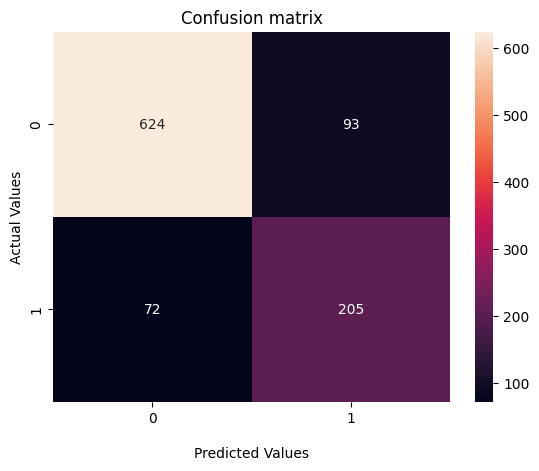

In [185]:
# Confusion matrix visualization
def plot_cm(cm):
    ax = sns.heatmap(cm, annot=True, fmt='g')
    ax.set_title('Confusion matrix')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()
    
# final model training
final_model = XGBClassifier(random_state=42)
final_model.fit(X_train_scaled, y_train)
pred = final_model.predict(X_test_scaled)
cm_model = confusion_matrix(y_test, pred)

print("Accuracy: %.4f " % accuracy_score(y_test, pred))
print("Roc_auc score: %.4f \n" % roc_auc_score(y_test, pred))
print(classification_report(y_test, pred))
plot_cm(cm_model)

0. Feature: blueHeralds (0.2939)
1. Feature: redHeralds (0.1746)
2. Feature: blueGoldDiff (0.0996)
3. Feature: redWardsPlaced (0.0572)
4. Feature: blueWardsPlaced (0.0519)
5. Feature: blueDragons (0.0337)
6. Feature: blueTowersDestroyed (0.0319)
7. Feature: blueExperienceDiff (0.0285)
8. Feature: redTowersDestroyed (0.0196)
9. Feature: redAssists (0.0186)
10. Feature: blueKills (0.0178)
11. Feature: redWardsDestroyed (0.0164)
12. Feature: blueAssists (0.0162)
13. Feature: redTotalJungleMinionsKilled (0.0157)
14. Feature: blueAvgLevel (0.0155)
15. Feature: redDragons (0.0145)
16. Feature: blueTotalGold (0.0144)
17. Feature: redTotalExperience (0.0144)
18. Feature: blueTotalJungleMinionsKilled (0.0143)
19. Feature: blueFirstBlood (0.0129)
20. Feature: blueWardsDestroyed (0.0129)
21. Feature: blueDeaths (0.0128)
22. Feature: blueTotalMinionsKilled (0.0128)


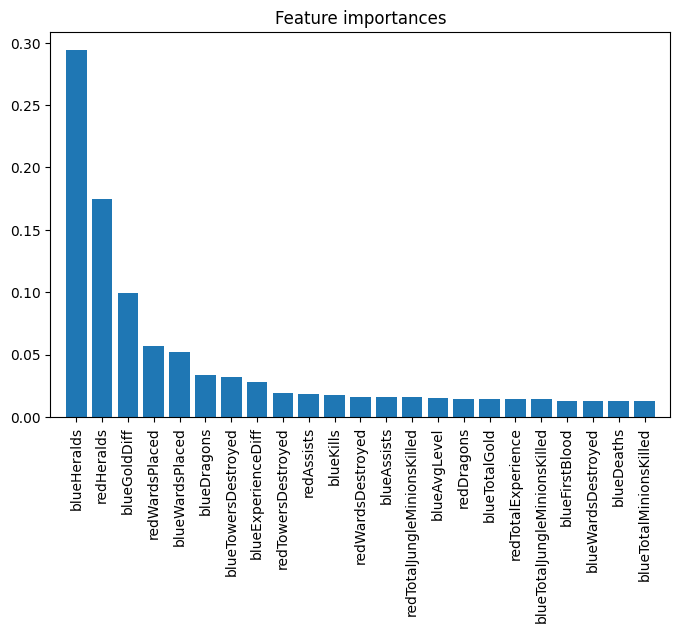

In [186]:
# Model feature importances visualization
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]
feat_names = X.columns

for i in range(X.shape[1]):
    print(f'{i}. Feature: {X.columns[indices][i]} ({importances[indices[i]]:.4f})')

plt.figure(figsize=(8,5))
plt.title("Feature importances")
plt.bar(x=range(len(indices)), height=importances[indices], align="center")
plt.xticks(ticks=range(len(indices)), labels=feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()